<a href="https://colab.research.google.com/github/SuvojitSantra/Online-Chat-Application-/blob/main/stock_price_prediction_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
import yfinance as yf

# Download stock data (e.g., Apple)
data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
data = data[['Close']]  # We'll predict closing prices
data.tail()


/tmp/ipython-input-1449114984.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2023-12-22,192.192566
2023-12-26,191.646561
2023-12-27,191.745819
2023-12-28,192.172699
2023-12-29,191.130325


In [ ]:
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

X = data[['Close']]  # features
y = data['Target']   # label


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
predictions = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 7.734073771804131


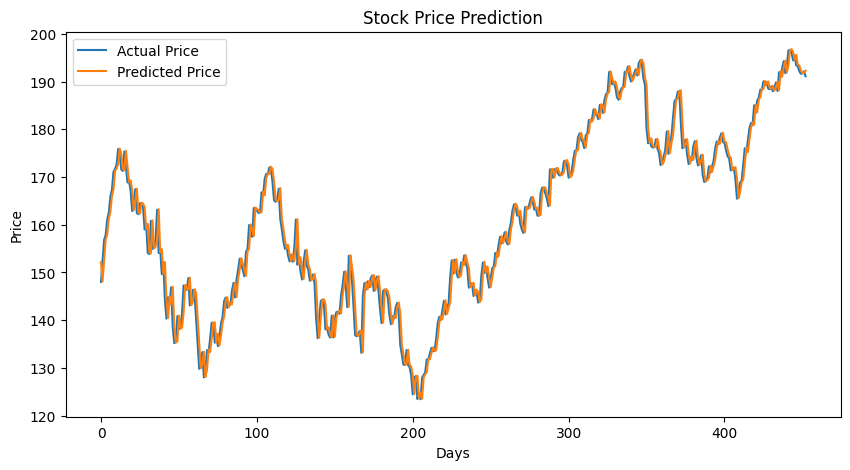

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


new one


/tmp/ipython-input-2547854711.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2025-01-01', end='2025-08-06')
[*********************100%***********************]  1 of 1 completed


Predicted next day's price: 203.70699192992052


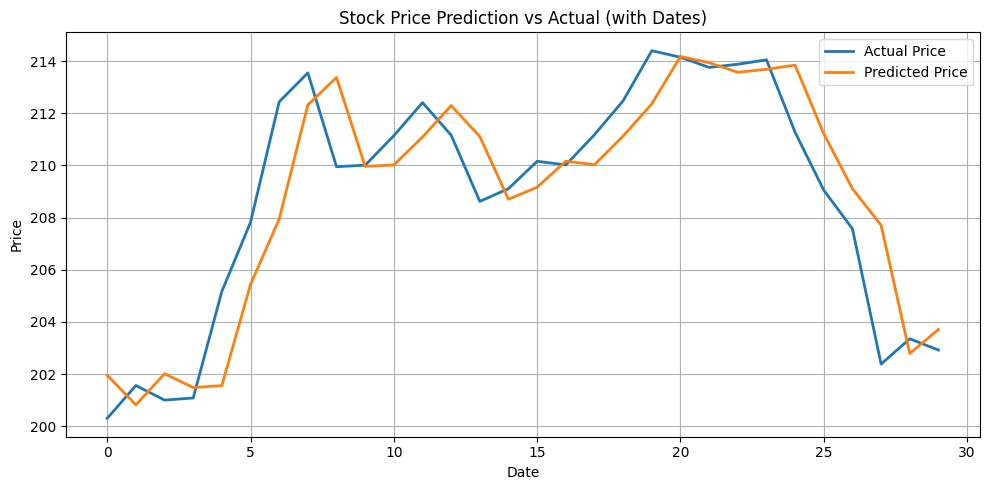

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Load data
data = yf.download('AAPL', start='2025-01-01', end='2025-08-06')
data = data[['Close']]

# 2. Create target column (next day's price)
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# 3. Features and labels
X = data[['Close']]
y = data['Target']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 5. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict
predictions = model.predict(X_test)


latest_price = data['Close'].iloc[-1]  # today’s closing price
# Reshape the input for the model.predict() method
predicted_next_price = model.predict([[latest_price.values[0]]])
print("Predicted next day's price:", predicted_next_price[0])


# 7. Reset index for plotting
y_test = y_test.reset_index(drop=True)
pred_series = pd.Series(predictions, name='Predicted')

# 8. Plot both actual and predicted
# 8. Plot with dates on x-axis
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_test.index, predictions, label='Predicted Price', linewidth=2)
plt.title('Stock Price Prediction vs Actual (with Dates)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Download stock data
df = yf.download("TATAMOTORS.NS", start="2015-01-01", end="2025-08-05")  # till yesterday

# 2. Select features
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 3. Create targets: next day's Open, High, Low, Close
df['Open_Target'] = df['Open'].shift(-1)
df['High_Target'] = df['High'].shift(-1)
df['Low_Target'] = df['Low'].shift(-1)
df['Close_Target'] = df['Close'].shift(-1)

df.dropna(inplace=True)  # Drop the last row (which has NaNs)

# 4. Define features (X) and targets (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df[['Open_Target', 'High_Target', 'Low_Target', 'Close_Target']]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 6. Train model (multi-output regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predict tomorrow’s prices using the most recent data
latest_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[-1]
predicted_prices = model.predict([latest_data])[0]

# 8. Display result
print("📈 Predicted Prices for the Next Day:")
print(f"Open : {predicted_prices[0]:.2f}")
print(f"High : {predicted_prices[1]:.2f}")
print(f"Low  : {predicted_prices[2]:.2f}")
print(f"Close: {predicted_prices[3]:.2f}")


/tmp/ipython-input-1422390768.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TATAMOTORS.NS", start="2015-01-01", end="2025-08-05")  # till yesterday
[*********************100%***********************]  1 of 1 completed

📈 Predicted Prices for the Next Day:
Open : 650.00
High : 657.89
Low  : 639.31
Close: 648.87


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Download Tata Motors stock data
df = yf.download("TATAMOTORS.NS", start="2015-01-01", end="2025-08-06")
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Step 2: Feature engineering
df['Price_Change_Pct'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['Is_Price_Up'] = (df['Close'] > df['Open']).astype(int)
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['Volatility_5'] = df['Close'].rolling(window=5).std()

# Step 3: Create target labels
df['Future_Close'] = df['Close'].shift(-1)  # for next day
df['Target_Direction'] = (df['Future_Close'] > df['Close']).astype(int)  # 1 = up, 0 = down
df['Target_Change_Pct'] = ((df['Future_Close'] - df['Close']) / df['Close']) * 100

# Step 4: Drop missing values
df.dropna(inplace=True)

# Step 5: Define features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change_Pct',
            'Is_Price_Up', 'MA_5', 'MA_10', 'Volatility_5']
X = df[features]
y = df['Target_Direction']  # classification target: 1=up, 0=down

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Step 7: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Predict direction on test set
y_pred = model.predict(X_test)

# Step 9: Evaluation
print("📊 Classification Report (Direction Prediction):")
print(classification_report(y_test, y_pred))

# Step 10: Predict for the next day
latest_input = df[features].iloc[-1]
direction_pred = model.predict([latest_input])[0]  # 0 or 1
change_pct_pred = df['Target_Change_Pct'].iloc[-1]  # actual % change label for info

# Step 11: Print next day prediction
print("\n🔮 PREDICTION FOR TOMORROW (TATA MOTORS):")
if direction_pred == 1:
    print(f"📈 Predicted: UP — Estimated change: +{abs(change_pct_pred):.2f}%")
else:
    print(f"📉 Predicted: DOWN — Estimated change: -{abs(change_pct_pred):.2f}%")

# Step 12: Plot actual vs predicted direction
# Convert 0 → -1 to show UP/DOWN clearly on plot
y_test_numeric = y_test.reset_index(drop=True).replace({0: -1, 1: 1})
y_pred_numeric = pd.Series(y_pred).replace({0: -1, 1: 1})

plt.figure(figsize=(12, 5))
plt.plot(y_test_numeric, label="Actual Direction", linestyle='-', linewidth=2)
plt.plot(y_pred_numeric, label="Predicted Direction", linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Stock Direction (1 = UP, -1 = DOWN)")
plt.xlabel("Days (Test Samples)")
plt.ylabel("Direction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2458669640.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TATAMOTORS.NS", start="2015-01-01", end="2025-08-06")
[*********************100%***********************]  1 of 1 completed


ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.